# SNSim Examples

In [1]:
import sys
sys.path.append('/home/carreres/Documents/SNSIM')
import snsim
import numpy as np
import matplotlib.pyplot as plt

## Simulate one SNIa by setting the parameters

### Init survey file

In [2]:
# Set the cosmology
cosmology = {'name': 'planck18'}
cosmo =  snsim.utils.set_cosmo(cosmology)

# Set the sncosmo model
sn_model = snsim.utils.init_sn_model('salt2')

# Set the survey
survey_config = {'survey_file': '/home/carreres/Documents/SNSIM/Untitled Folder/survey_file_example.csv',
                 'sig_psf': 0.0,
                 'sig_zp': 0.0,
                 'gain': 1.,
                 'zp': 26.,
                 'ra_size': 7.295,
                 'dec_size': 7.465,
                 'noise_key': ['skynoise', 'skysigADU']}
survey = snsim.survey_host.SurveyObs(survey_config)
survey.print_config()

SURVEY FILE : /home/carreres/Documents/SNSIM/Untitled Folder/survey_file_example.csv
First day in survey_file : 58000.00 MJD / 2017-09-04 00:00:00.000
Last day in survey_file : 58100.00 MJD / 2017-12-13 00:00:00.000
Survey effective duration is 100.00 days
No cut on survey file.


### Init SN 

In [3]:
zcos = 0.05
coords = np.radians([42, 42])
sn_par = {'zcos': zcos,
          'z2cmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 300,
          'sim_t0': 58030,
          'ra': coords[0],
          'dec': coords[1],
          'mag_sct': 0.0,
          'sncosmo': {'x1': 1, 'c': 0.1}
           }
model_par = {'M0': -19.3,
             'alpha': 0.14,
             'beta': 3.1,
             'mod_fcov': False}

SNIa = snsim.astrobj.SNIa(sn_par, sn_model, model_par=model_par)

In [4]:
epochs = survey.epochs_selection(SNIa.coord,
                                 (SNIa.sim_model.mintime(),
                                  SNIa.sim_model.maxtime()))

SNIa.epochs = epochs

SNIa.gen_flux(np.random.default_rng(1200))

### Plot the SN

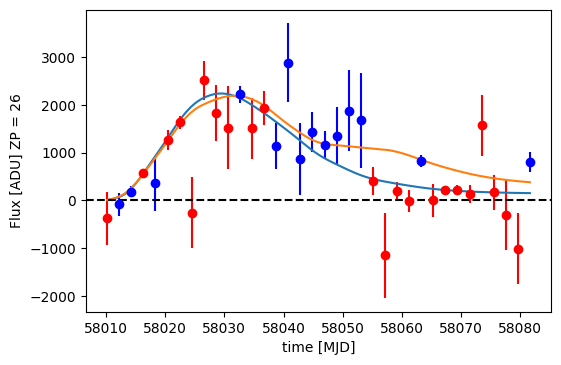

In [5]:
fig, ax = plt.subplots(dpi=100)
time = np.linspace(SNIa.sim_lc['time'].min(), SNIa.sim_lc['time'].max(), 500)
for b, c in zip(SNIa.sim_lc['band'].unique(), ['r', 'b']):
    ep = SNIa.sim_lc.query(f"band == '{b}'")
    ax.errorbar(ep['time'], ep['flux'], yerr=ep['fluxerr'], fmt='o', c=c)
    ax.plot(time, SNIa.sim_model.bandflux(b, time, zp=26., zpsys='ab'))
plt.ylabel('Flux [ADU] ZP = 26')
plt.xlabel('time [MJD]')
plt.axhline(0, c='k', ls='--');